In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from python_scripts.visualizer import Visualizer
from python_scripts.utilities import merge_config, save_results, load_results, single_to_batch_results

# Merge all simulations to single results file

In [ ]:
single_results_folder = "results/highd_simulations_pickle_new"
batch_results_path = "results/batch_results_new"

single_to_batch_results(single_results_folder, batch_results_path)

## Visualise all results

The number of scenarios passing the filter:  118
Biggest improvement:  ZAM_HighD-7_1_T-1  which reduced the slowdown by  20.160000000000007 km/h
Top 5 best improvements:  ['ZAM_HighD-7_1_T-1' 'ZAM_HighD-51_1_T-1' 'ZAM_HighD-48_11_T-1'
 'ZAM_HighD-16_2_T-1' 'ZAM_HighD-2_1_T-1']
Selection of no improvements:  ['ZAM_HighD-36_4_T-1' 'ZAM_HighD-34_2_T-1' 'ZAM_HighD-43_1_T-1'
 'ZAM_HighD-46_9_T-1' 'ZAM_HighD-35_8_T-1']


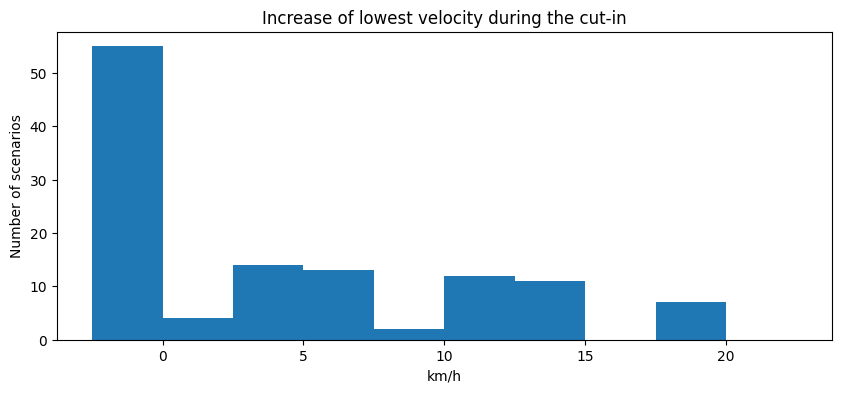

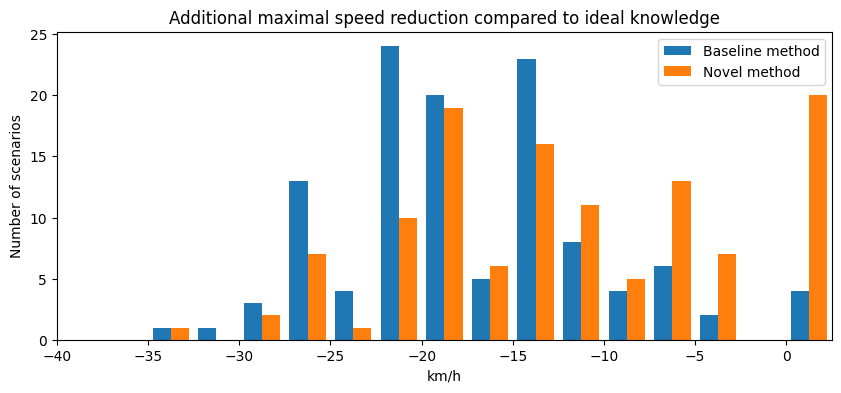

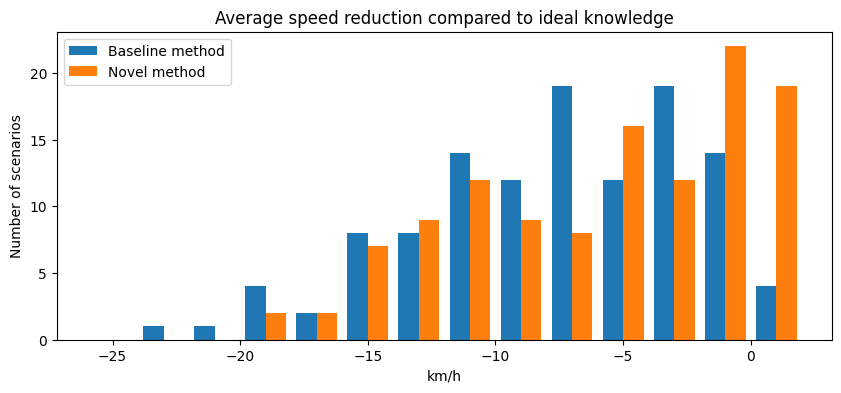

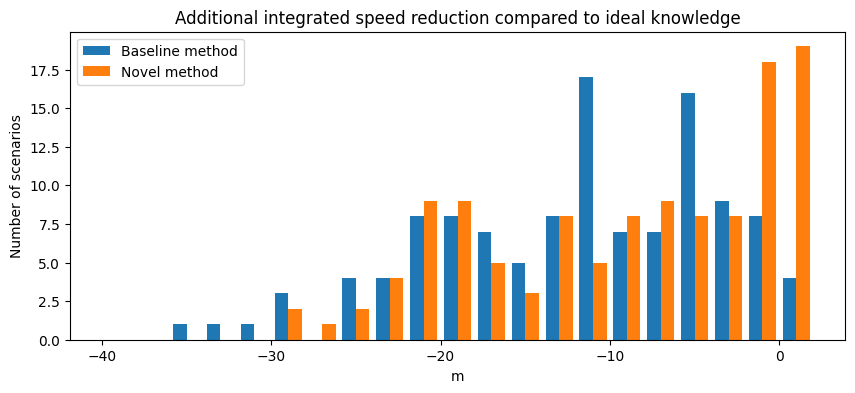

In [31]:
batch_results_path = "results/batch_results_new"
batch_results = pd.read_pickle(batch_results_path)
filtered_results = batch_results[batch_results.number_of_traffic < 6]

print_best = True
print_computational_times = True
plot_comparisson_baseline_max = True
plot_max_speed_reduction = True
plot_average_speed_reduction = True
plot_integrated_speed_reduction = True

#=================================================================================#
print("The number of scenarios passing the filter: ", len(filtered_results.index))

if print_best:
    batch_results["improvement_over_baseline"] = batch_results["min_vel_novel"]-batch_results["min_vel_baseline"]
    best_result = batch_results[batch_results["improvement_over_baseline"] == batch_results["improvement_over_baseline"].max()]
    print("Biggest improvement: ", best_result["scenario_id"].values[0], " which reduced the slowdown by ", best_result["improvement_over_baseline"].values[0]*3.6, "km/h")
    print("Top 5 best improvements: ", batch_results.sort_values(by=['improvement_over_baseline'], ascending=False)["scenario_id"].values[:5])
    print("Selection of no improvements: ", batch_results.sort_values(by=['improvement_over_baseline'], ascending=True)["scenario_id"].values[:5])

if print_computational_times:
    pass

if plot_comparisson_baseline_max:
    fig = plt.figure(figsize=(10,4))
    plt.hist((filtered_results["min_vel_novel"] - filtered_results["min_vel_baseline"])*3.6, 
            np.arange(-2.4999, 25, 2.5))
    plt.title("Increase of lowest velocity during the cut-in")
    plt.xlabel("km/h")
    plt.ylabel("Number of scenarios")
    plt.show()

if plot_max_speed_reduction:
    fig = plt.figure(figsize=(10,4))
    plt.hist([(filtered_results["min_vel_baseline"] - filtered_results["min_vel_ideal"])*3.6,
              (filtered_results["min_vel_novel"] - filtered_results["min_vel_ideal"])*3.6], 
             np.arange(-40.0001, 3,2.5),
             label = ["novel method", "baseline method"])
    plt.title("Additional maximal speed reduction compared to ideal knowledge")
    plt.xlabel("km/h")
    plt.ylabel("Number of scenarios")
    plt.legend(["Baseline method", "Novel method"])
    plt.xlim([-40,2.5])
    plt.show()

if plot_average_speed_reduction:
    fig = plt.figure(figsize=(10,4))
    plt.hist([(filtered_results["avg_vel_baseline"] - filtered_results["avg_vel_ideal"])*3.6,
              (filtered_results["avg_vel_novel"] - filtered_results["avg_vel_ideal"])*3.6], 
             np.arange(-26.0001, 2.9999,2),
             label = ["Baseline method", "Novel method"])
    plt.title("Average speed reduction compared to ideal knowledge")
    plt.xlabel("km/h")
    plt.ylabel("Number of scenarios")
    plt.legend(["Baseline method", "Novel method"])
    plt.show()

if plot_integrated_speed_reduction:
    fig = plt.figure(figsize=(10,4))
    plt.hist([filtered_results["integrated_vel_reduction_baseline"] - filtered_results["integrated_vel_reduction_ideal"],
              filtered_results["integrated_vel_reduction_novel"] - filtered_results["integrated_vel_reduction_ideal"]], 
             np.arange(-40.0001, 3.9999,2),
             label = ["novel method", "baseline method"])
    plt.title("Additional integrated speed reduction compared to ideal knowledge")
    plt.xlabel("m")
    plt.ylabel("Number of scenarios")
    plt.legend(["Baseline method", "Novel method"])
    plt.show()